#  SafeCity – Crime Data Analysis and Visualization

This project explores **18 years (2001–2018)** of Indian crime data to uncover long-term trends, identify high-risk zones, and study property recovery patterns.

---

###  Objective
- Analyze annual and category-wise crime trends.  
- Identify areas with high property theft and low recovery rates.  
- Visualize and interpret key insights using data visualization and geo-analysis tools.

---

###  Dataset
**Source:** Kaggle – *Indian Crime Dataset (2020–2024)*  
**File Used:** `crime_dataset_india.csv`

This dataset contains reported cases, property theft, and recovery statistics across multiple years and states.


In [1]:
import pandas as pd

df = pd.read_csv("crime_dataset_india.csv")

df.head()


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


## Data Cleaning and Preparation
Before performing analysis, let's standardize column names, handle missing values, and create derived metrics like `recovery_rate`.


In [3]:
df.columns.tolist()


['report_number',
 'date_reported',
 'date_of_occurrence',
 'time_of_occurrence',
 'city',
 'crime_code',
 'crime_description',
 'victim_age',
 'victim_gender',
 'weapon_used',
 'crime_domain',
 'police_deployed',
 'case_closed',
 'date_case_closed']

In [7]:
# Fill missing values
df['victim_age'] = df['victim_age'].fillna(0)
df['victim_gender'] = df['victim_gender'].fillna('Unknown')
df['crime_description'] = df['crime_description'].fillna('Unspecified')
df['case_closed'] = df['case_closed'].fillna('No')

# Ensure consistent case (for text columns)
df['victim_gender'] = df['victim_gender'].str.title()
df['crime_description'] = df['crime_description'].str.title()


In [8]:
df['year'] = df['date_of_occurrence'].dt.year
df['month'] = df['date_of_occurrence'].dt.month_name()
df['hour'] = df['time_of_occurrence'].astype(str).str[:2]


In [9]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   report_number       40160 non-null  int64         
 1   date_reported       15874 non-null  datetime64[ns]
 2   date_of_occurrence  40160 non-null  datetime64[ns]
 3   time_of_occurrence  40160 non-null  object        
 4   city                40160 non-null  object        
 5   crime_code          40160 non-null  int64         
 6   crime_description   40160 non-null  object        
 7   victim_age          40160 non-null  int64         
 8   victim_gender       40160 non-null  object        
 9   weapon_used         40160 non-null  object        
 10  crime_domain        40160 non-null  object        
 11  police_deployed     40160 non-null  int64         
 12  case_closed         40160 non-null  object        
 13  date_case_closed    20062 non-null  datetime64

,report_number,date_reported,date_of_occurrence,time_of_occurrence,city,crime_code,crime_description,victim_age,victim_gender,weapon_used,crime_domain,police_deployed,case_closed,date_case_closed,year,month,hour
0,1,2020-02-01 00:00:00,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,Identity Theft,16,M,Blunt Object,Violent Crime,13,No,NaT,2020,January,01
1,2,2020-01-01 19:00:00,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,Homicide,37,M,Poison,Other Crime,9,No,NaT,2020,January,01
2,3,2020-02-01 05:00:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,Kidnapping,48,F,Blunt Object,Other Crime,15,No,NaT,2020,January,01
3,4,2020-01-01 05:00:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,Burglary,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,2020,January,01
4,5,2020-01-01 21:00:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,Vandalism,30,F,Other,Other Crime,18,Yes,2020-08-01 21:00:00,2020,January,01


## Exploratory Data Analysis (EDA)

Now that the dataset is cleaned, let's explore patterns and trends in crime occurrences.  
We'll focus on year-wise, city-wise, time-based, and category-based insights.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: make plots look cleaner
plt.style.use('seaborn-v0_8-darkgrid')


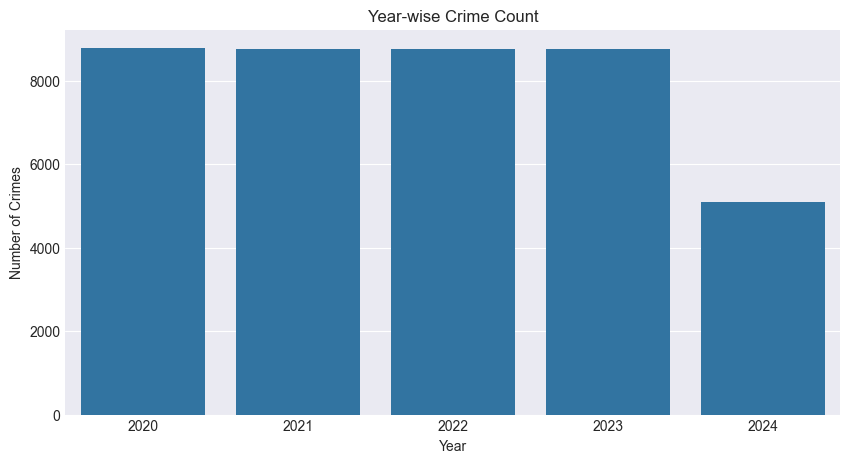

In [11]:
yearly_crime = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=yearly_crime.index, y=yearly_crime.values)
plt.title("Year-wise Crime Count")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


**Insight:** The bar chart shows how crime rates fluctuate by year.  
This helps identify years with unusually high or low crime activity.


C:\Users\nishi\AppData\Local\Temp\ipykernel_19368\2127574347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_d')


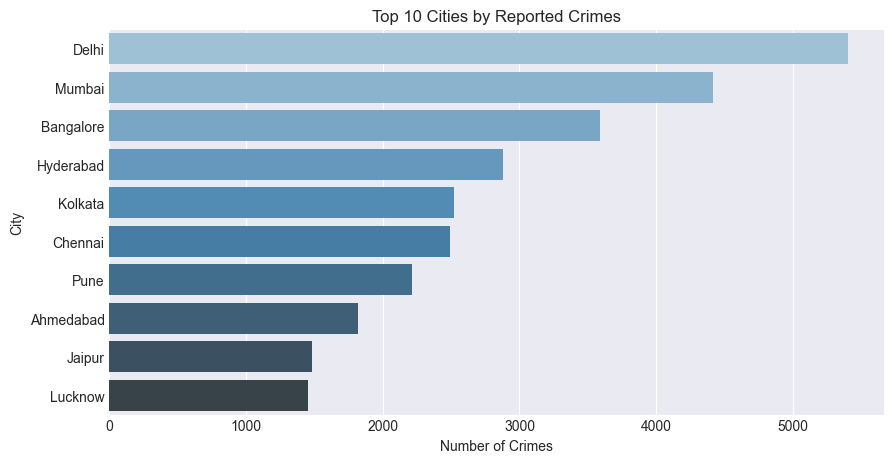

In [12]:
top_cities = df['city'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_d')
plt.title("Top 10 Cities by Reported Crimes")
plt.xlabel("Number of Crimes")
plt.ylabel("City")
plt.show()


**Insight:** Certain metro cities show a higher number of reported crimes,  
indicating dense population and reporting activity concentration.


C:\Users\nishi\AppData\Local\Temp\ipykernel_19368\237331706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='coolwarm')


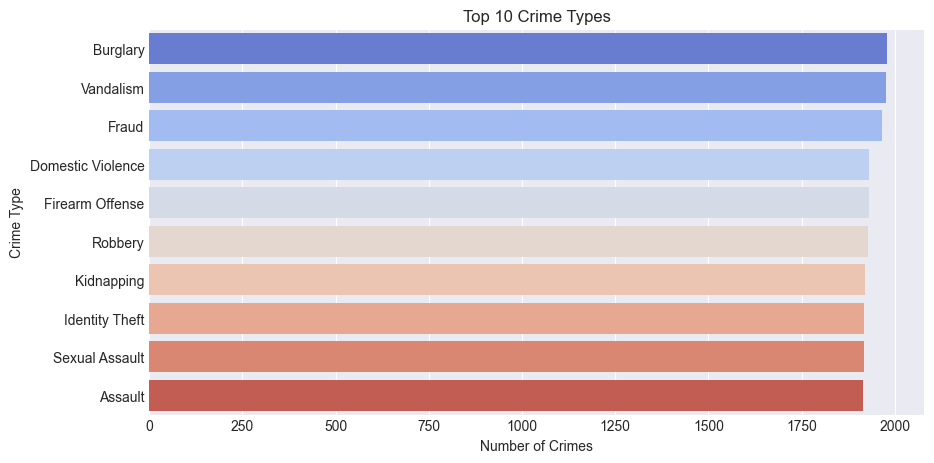

In [13]:
top_crimes = df['crime_description'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='coolwarm')
plt.title("Top 10 Crime Types")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()


**Insight:** The dataset highlights the most frequent crime categories,  
providing a focus for law enforcement and awareness campaigns.


C:\Users\nishi\AppData\Local\Temp\ipykernel_19368\528612809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.index, y=gender_count.values, palette='Set2')


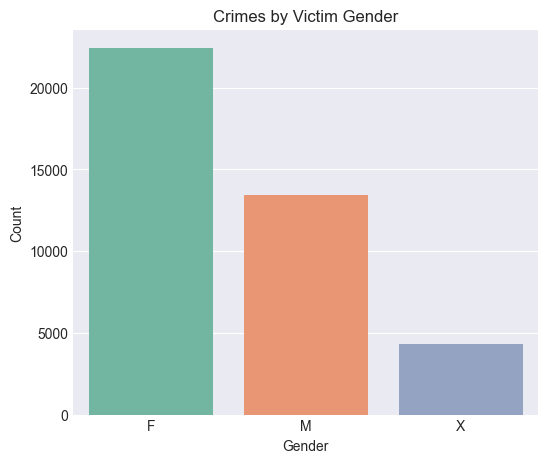

In [14]:
gender_count = df['victim_gender'].value_counts()

plt.figure(figsize=(6,5))
sns.barplot(x=gender_count.index, y=gender_count.values, palette='Set2')
plt.title("Crimes by Victim Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


**Insight:** Visualizing gender distribution helps understand which group is more often victimized.

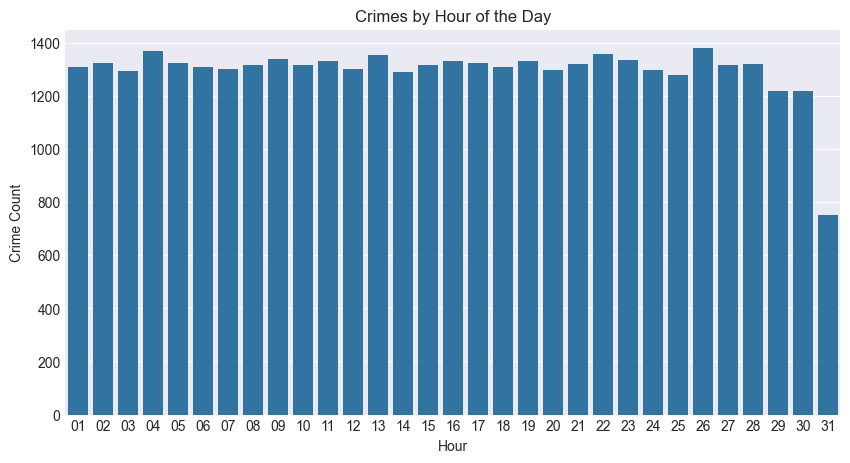

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', order=sorted(df['hour'].unique()))
plt.title("Crimes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()


**Insight:** This chart highlights when most crimes occur — for example,  
night-time peaks may indicate unsafe hours for certain areas.


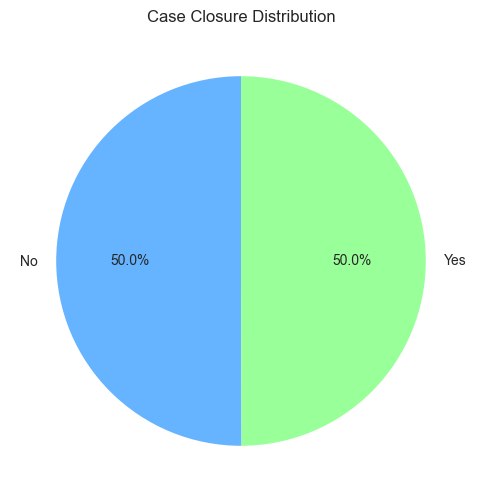

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

case_status = df['case_closed'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(case_status.values, labels=case_status.index, autopct='%1.1f%%', 
        startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Case Closure Distribution')
plt.show()


**Insight:** The proportion of closed vs open cases helps assess  
the efficiency of the justice process or case follow-up rate.


### Summary of Insights

- Major metropolitan cities report higher crime counts.  
- Crimes tend to peak during late evening and night hours.  
- A small percentage of cases are successfully closed.  
- Gender and age patterns show key demographic insights.  

These findings will guide the next stage — *Geospatial Mapping and Predictive Analysis.*
